# Matplotlib_cheat_code

## index
* 1. 여러 데이터 출력
* 2. barplot 활용하기
* 3. 막대/원/산점도 그래프
* 4. 기타 그래프

ref: https://www.youtube.com/watch?v=PjhlUzp_cU0

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

____
## 1. 여러 데이터 출력하기

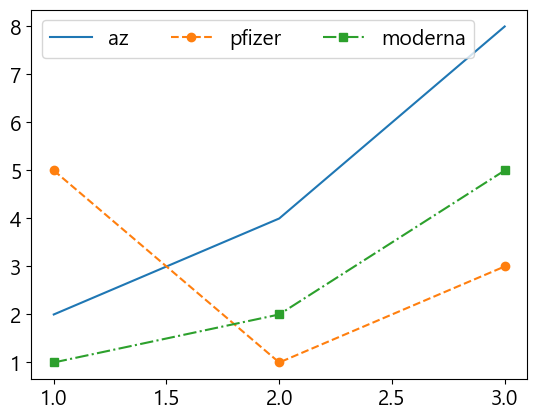

In [3]:
days = [1, 2, 3] # 1일, 2일, 3일
az = [2, 4, 8] # (단위 : 만명) 1일부터 3일까지 아스트라제네카 접종인구
pfizer = [5, 1, 3] # 화이타
moderna = [1, 2, 5] # 모더나


plt.plot(days, az, label='az')
plt.plot(days, pfizer, label='pfizer', marker='o', linestyle='--')
plt.plot(days, moderna, label='moderna', marker='s', ls='-.')

plt.legend(ncol=3)
# ncol = 3 // 범주를 3열에 맞춰서 출력
# ncol의 default값은 None 이며 Matplotlib에서 자동으로 최적의 열 수에 맞춰 출력해준다.

____
## 2. barplot 활용하기

(array([170., 175., 180., 185., 190., 195., 200.]),
 [Text(0, 170.0, '170'),
  Text(0, 175.0, '175'),
  Text(0, 180.0, '180'),
  Text(0, 185.0, '185'),
  Text(0, 190.0, '190'),
  Text(0, 195.0, '195'),
  Text(0, 200.0, '200')])

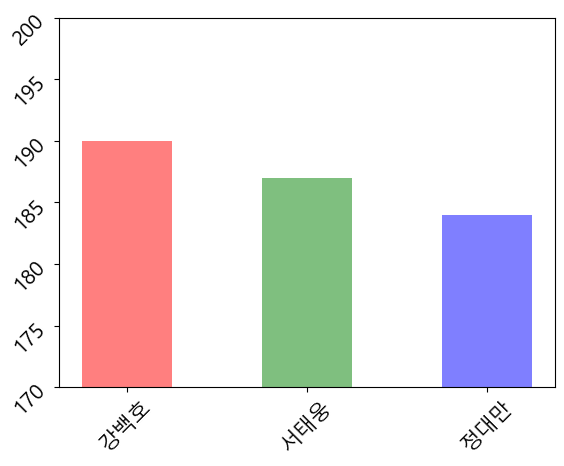

In [13]:
labels = ['강백호', '서태웅', '정대만'] # 이름
values = [190, 187, 184] # 키
colors = ['r', 'g', 'b']


plt.bar(labels, values, color=colors, alpha=0.5, width=0.5)
plt.ylim(170,200)
# y축 값의 범위를 설정함
# xlim으로 할 경우 x축 값의 범위를 설정함.

plt.xticks(rotation=45) # x 축의 이름 데이터 각도를 45 도로 설정
plt.yticks(rotation=45) # y 축의 키 데이터 각도를 45도로 설정

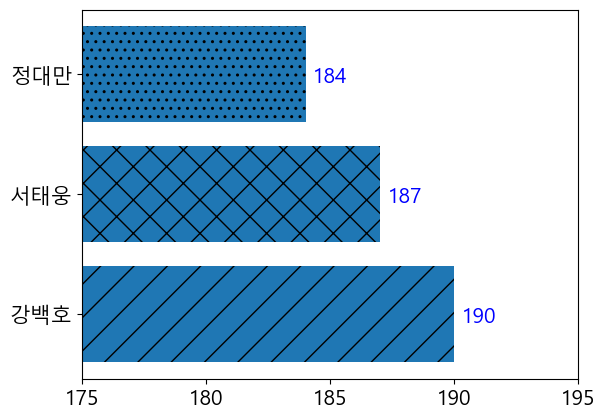

In [24]:
labels = ['강백호', '서태웅', '정대만'] # 이름
values = [190, 187, 184] # 키

bar = plt.barh(labels, values)
# 기본 barplot은 plt.bar() 이지만
# 가로형 barplot은 plt.barh()

plt.xlim(175, 195)

bar[0].set_hatch('/') # ////
bar[1].set_hatch('x') # xxxx
bar[2].set_hatch('..') # ...


for idx, rect in enumerate(bar):
    plt.text(rect.get_width() + 1, idx-0.07, values[idx], ha='center', color='blue')
    # rect = plot 내 bar의 객체이며 get_width() 메소드는 bar의 너비를 return 함
    # 반대로 get_height()를 할 경우 객체의 높이를 반환하며 일반적인 barplot을 할때 사용할 수 있음.


____
## 3. 막대/원/산점도 그래프

In [26]:
import pandas as pd

df = pd.read_excel('score.xlsx')
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기
0,1번,채치수,북산고,197,90,85,100,95,85,Python
1,2번,정대만,북산고,184,40,35,50,55,25,Java
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript
3,4번,서태웅,북산고,187,40,60,70,75,80,NaN
4,5번,강백호,북산고,188,15,20,10,35,10,NaN
5,6번,변덕규,능남고,202,80,100,95,85,80,C
6,7번,황태산,능남고,188,55,65,45,40,35,PYTHON
7,8번,윤대협,능남고,190,100,85,90,95,95,C#


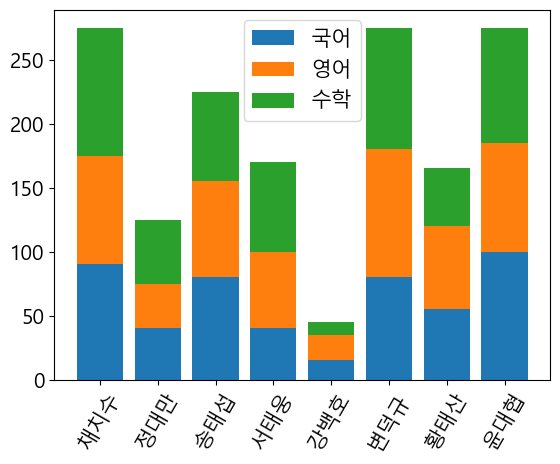

In [31]:
# 막대 그래프  / Bar

plt.bar(df['이름'], df['국어'], label='국어')
plt.bar(df['이름'], df['영어'], bottom=df['국어'], label='영어')
# ['국어']를 밑에 두는 형태로 ['영어']를 누적하여 출력
plt.bar(df['이름'], df['수학'], bottom=df['국어'] + df['영어'], label='수학')
# ['수학']을 밑에 두는 형태로 ['국어'] + ['영어']를 누적하여 출력

plt.xticks(rotation=60)
plt.legend()

In [44]:
# Numpy를 활용한 다중 막대 그래프 - 1

import numpy as np

N = df.shape[0] # 학생의 수가 필요하기 때문에 shape[0] == df의 row 값을 변수에 초기화
index = np.arange(N) # 각 학생 index에 맞는 numpy array 생성
index

array([0, 1, 2, 3, 4, 5, 6, 7])

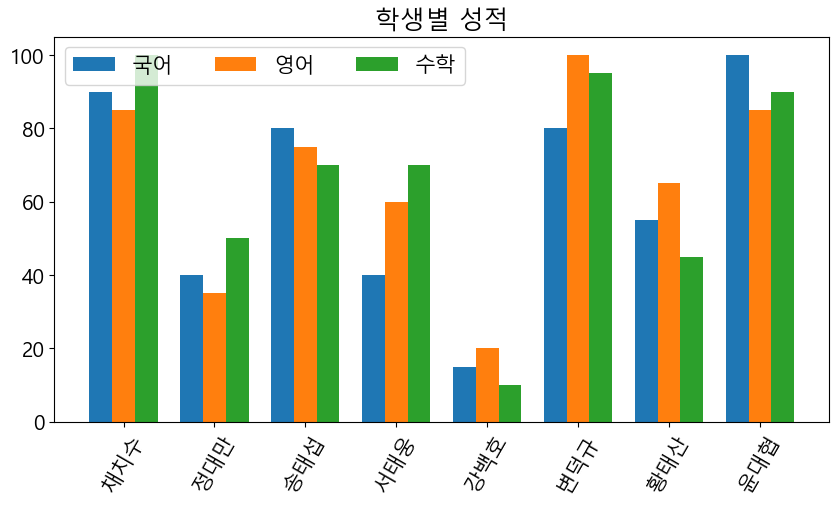

In [45]:
# Numpy를 활용한 다중 막대 그래프 - 2

plt.figure(figsize=(10, 5)) # 출력된 그래프 사진 크기 조절
plt.title('학생별 성적')


w = 0.25 # 한 자리에 3개의 막대를 표기하기 위한 적절한 width

# 국어, 영어, 수학. 각각 학생에 알맞는 index값에서 w만큼 더하거나 뺌으로써 막대가 적절한 자리에 위치하게 됨.
plt.bar(index - w, df['국어'], width=w, label='국어')
plt.bar(index, df['영어'], width=w, label='영어')
plt.bar(index + w, df['수학'], width=w, label='수학')

plt.legend(ncol=3) # 범주를 3열로 표기

plt.xticks(index, df['이름'], rotation=60) # index 위치에 df['이름']을 출력하고 60도만큼 돌려서 출력
plt.show()

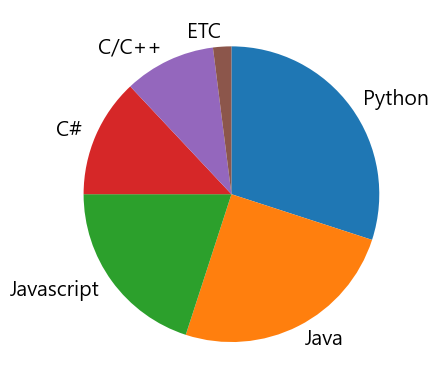

In [54]:
# 원 그래프 - 1

# 그래프로 출력할 data set
values = [30, 25, 20, 13, 10, 2]
labels = ['Python', 'Java', 'Javascript', 'C#', 'C/C++', 'ETC']

# 원그래프는 pie() 메소드 사용.
plt.pie(values, labels=labels, startangle=90, counterclock=False)
# startangle = 그래프를 그려나가기 시작할 시작 각도
# counterlock = False: 시계방향으로 그래프를 그려나감 / True: 반시계 방향

plt.show()


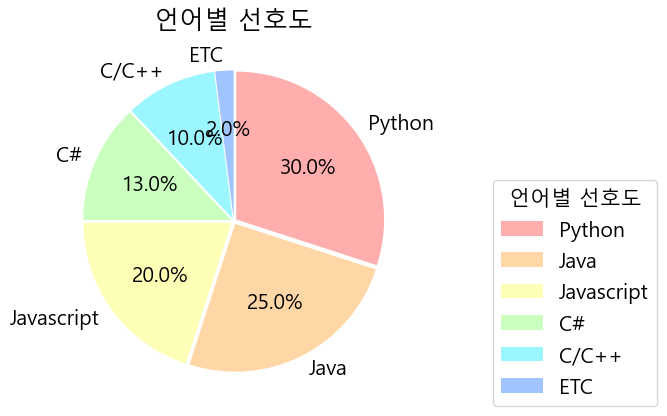

In [60]:
# 원 그래프 - 2

# 원 그래프에서 각 범주별 구분 공백 크기
explode = [0.02] * 6 # 6개의 범주라서 *6을 해줌
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff']
# pie() 메소드의 파라미터로 보낼 colors 리스트

plt.pie(values, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, colors=colors, explode=explode)
# autopct = 각 비율을 float 형태로 출력. 뒤 %%는 비율 출력 후 뒷부분에 %을 붙히기 위함.
# explode = 범주별 구분 공백 옵션
# colors = 각 범주별 색상 옵션

plt.title('언어별 선호도')
plt.legend(loc=(1.2, 0), title='언어별 선호도') 
# 범주의 위치 loc=(가로, 세로)
plt.show()

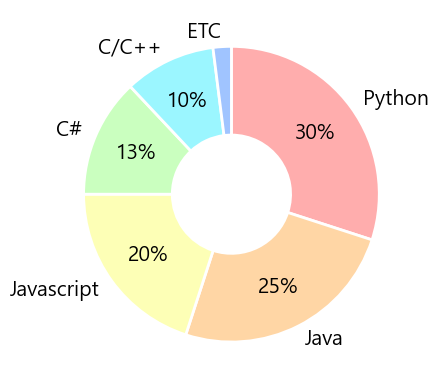

In [74]:
# 원 그래프 - 3


# 10퍼센트 이상 범주만 % 표기
def custom_autopct(pct):
    # return ('%.1f%%' % pct) if pct >= 10 else ''
    # return '{:.1f}%'.format(pct) if pct >= 10 else ''
    return '{:.0f}%'.format(pct) if pct >= 10 else ''

# 원 그래프의 부채꼴 영역의 속성들
# width = 부채꼴의 영역을 의미하며 1일 경우 도넛형이 아닌 원형이 됨.
# edgecolor = 원 그래프의 테두리 색상
# linewidth = 원 그래프의 테두리 두께
wedgeprops={'width':0.6, 'edgecolor':'w', 'linewidth':2}

plt.pie(values, labels=labels, autopct=custom_autopct, startangle=90, counterclock=False, colors=colors, \
        wedgeprops=wedgeprops, pctdistance=0.7)
# 위와 같이 autopct 파라미터로 함수값을 보내는게 가능
# wedgeprops = 원 그래프의 부채꼴 영역의 속성 등을 지정하는 파라미터
# pctdistance = default값은 0.6이며 입력 범위는 0~1임. 값이 작을수록 퍼센트값은 원의 중심에 표시되며 
# 값이 클수록 원의 둘레에 가까이 표시 됨.
plt.show()

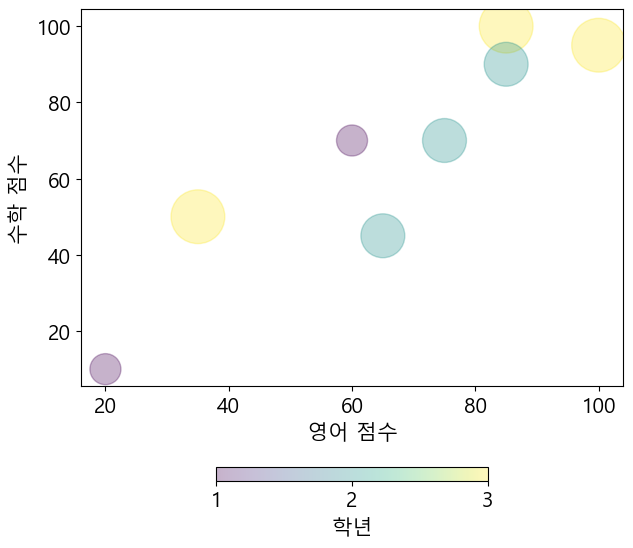

In [80]:
# 산점도 그래프

df['학년'] = [3, 3, 2, 1, 1, 3, 2, 2]
sizes = df['학년'] * 500 # 1학년 = 500, 2학년 = 1000, 3학년 = 1500

plt.figure(figsize=(7, 7))
# 산점도 그래프는 scatter() 메소드를 호출하여 사용함.
# scatter(x, y)꼴로 사용.
plt.scatter(df['영어'], df['수학'], s=sizes, c=df['학년'], cmap='viridis', alpha=0.3)
# s = 점의 크기를 나타냄
# c = 분포를 나타낼 범주를 나타냄
# cmap = colors map이며 c값에 대응되게끔 색상을 정해줌.
plt.xlabel('영어 점수')
plt.ylabel('수학 점수')
plt.colorbar(ticks=[1, 2, 3], label='학년', shrink=0.5, orientation='horizontal')
# 산점도 그래프 내 나오는 색상에 대한 설정 메서드
# ticks = 색상의 범위를 설정함
# shrink = colorbar의 크기를 설정함
# orientation = colorbar 표기 타입을 설정함. 'vertical' or 'horizontal'
plt.show()

____
## 4. 기타 그래프

In [ ]:
# 기타 여러가지 그래프를 한번에 표기하기


# 15-10 사이즈의 subplot 객체를 2 x 2 로 생성
fig, axs = plt.subplots(2, 2, figsize=(15, 10)) # 2 x 2 에 해당하는 plot 들을 생성
fig.suptitle('여러 그래프 넣기')


# 총 4개의 그래프를 설정할 수 있으며 각각의 그래프는 axs[0~1, 0~1]로 표기/설정할 수 있다.

# 첫 번째 그래프
axs[0, 0].bar(df['이름'], df['국어'], label='국어점수') # 데이터 설정
axs[0, 0].set_title('첫 번째 그래프') # 제목
axs[0, 0].legend() # 범례
axs[0, 0].set(xlabel='이름', ylabel='점수') # x, y 축 label
axs[0, 0].set_facecolor('lightyellow') # 전면 색
axs[0, 0].grid(linestyle='--', linewidth=0.5) # 그래프 내 보조선

# 두 번째 그래프
axs[0, 1].plot(df['이름'], df['수학'], label='수학')
axs[0, 1].plot(df['이름'], df['영어'], label='영어')
axs[0, 1].legend()

# 세 번째 그래프
axs[1, 0].barh(df['이름'], df['키'])

# 네 번째 그래프
axs[1, 1].plot(df['이름'], df['사회'], color='green', alpha=0.5)